In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib widget
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('bitcoin.csv')
df.head() 

,Date,Open,High,Low,Close,Vol.
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K


In [65]:
df.shape

(3793, 6)

In [66]:
df.describe()

,Open,High,Low,Close
count,3793.000000,3793.000000,3793.000000,3793.000000
mean,11233.252307,11529.297996,10904.581545,11240.315766
std,15421.568722,15827.119004,14960.319732,15422.533996
min,13.300000,13.400000,13.200000,13.300000
25%,450.300000,459.600000,441.900000,451.400000
50%,5208.300000,5322.900000,5033.700000,5209.100000
75%,14976.200000,15648.300000,13902.300000,15043.000000
max,67528.700000,68990.600000,66334.900000,67527.900000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3793 non-null   object 
 1   Open    3793 non-null   float64
 2   High    3793 non-null   float64
 3   Low     3793 non-null   float64
 4   Close   3793 non-null   float64
 5   Vol.    3793 non-null   object 
dtypes: float64(4), object(2)
memory usage: 177.9+ KB


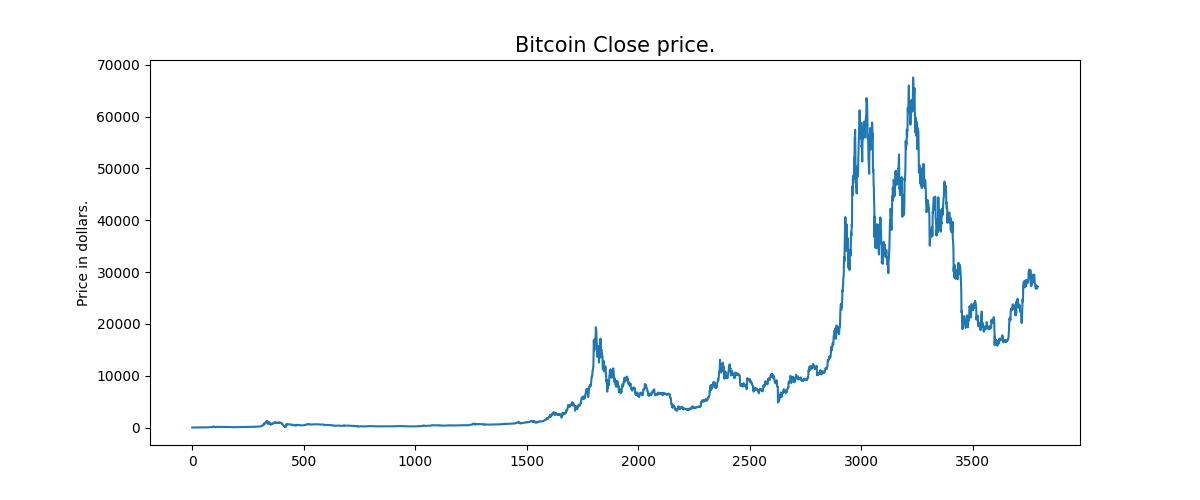

In [68]:
plt.close()
plt.figure(figsize=(12, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [69]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
Vol.     0
dtype: int64

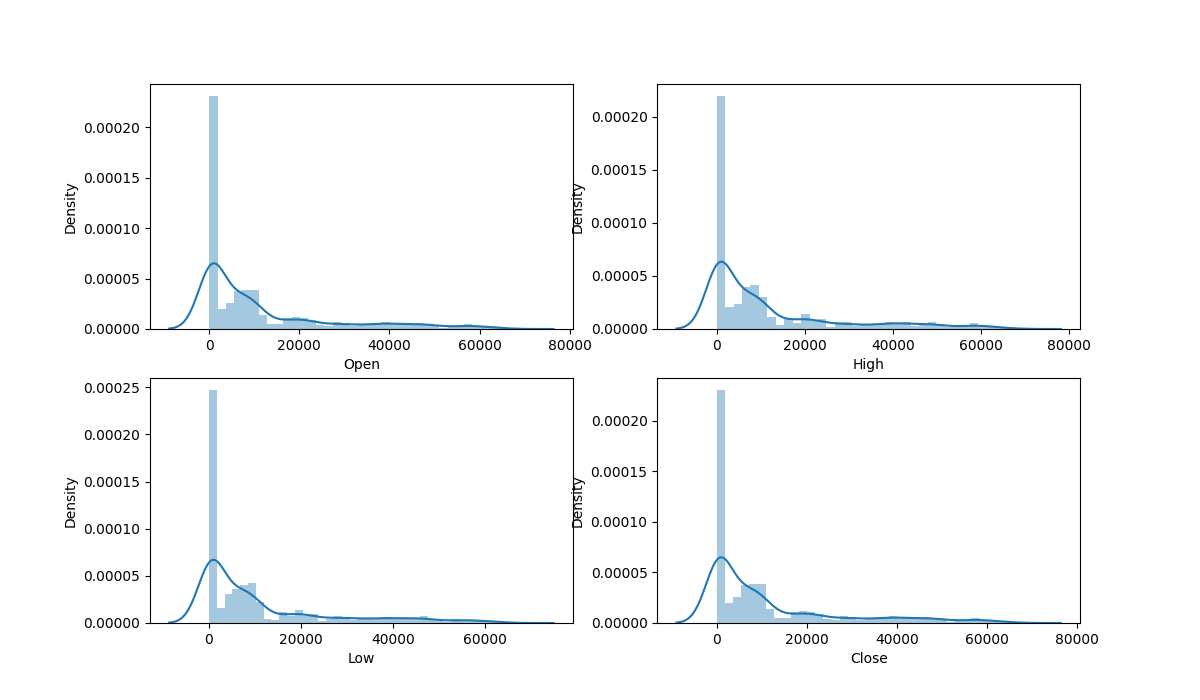

In [70]:
features = ['Open', 'High', 'Low', 'Close']
plt.close()
plt.subplots(figsize=(12,7))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

In [72]:
splitted = df['Date'].str.split('-', expand=True)
 
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Vol.,open-close,low-high,target,year,month,day
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K,0.2,-0.4,0,2013,1,1
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K,0.0,-0.2,1,2013,1,2
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K,-0.1,-0.2,1,2013,1,3
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K,-0.1,-0.2,0,2013,1,4
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K,0.1,-0.3,0,2013,1,5


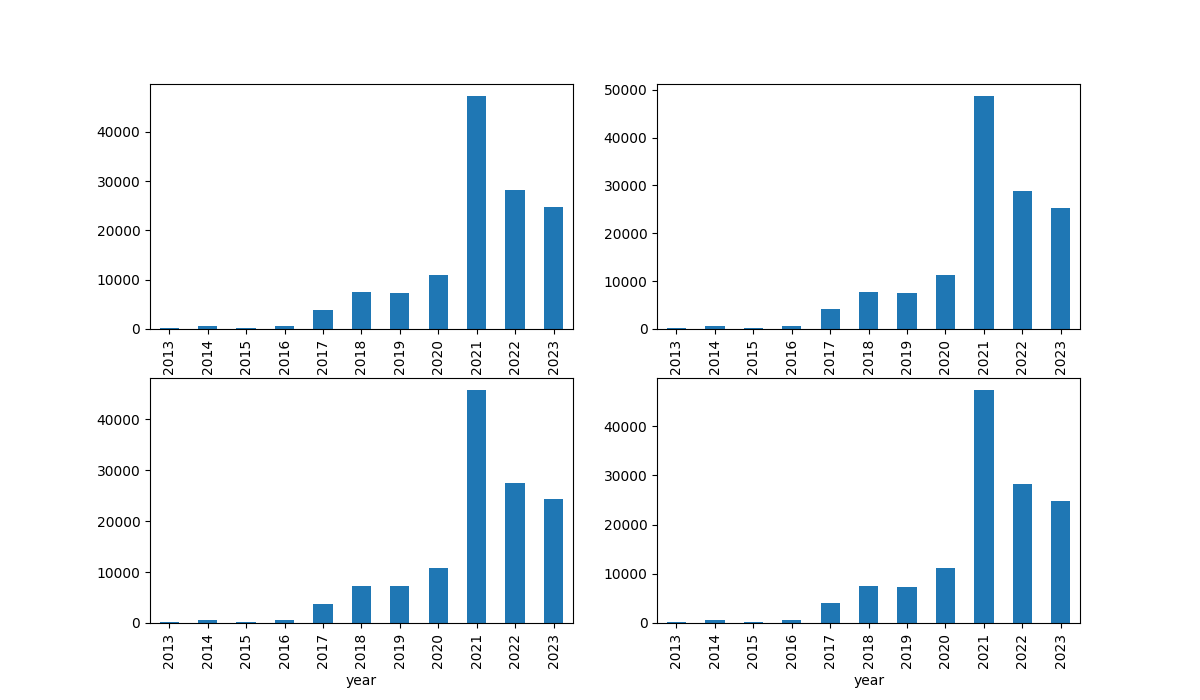

In [74]:
plt.close()
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(12,7))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [81]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Vol.,open-close,low-high,target,year,month,day,is_quarter_end
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K,0.2,-0.4,0,2013,1,1,0
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K,0.0,-0.2,1,2013,1,2,0
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K,-0.1,-0.2,1,2013,1,3,0
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K,-0.1,-0.2,0,2013,1,4,0
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K,0.1,-0.3,0,2013,1,5,0


0

In [82]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [83]:
a=np.where(df['Close'].shift(-1) == df['Close'], 1, 0)

In [84]:
df['target'][1]

1

In [85]:
print(df['Close'][1],df['Close'].shift(-1)[1])

13.3 13.4


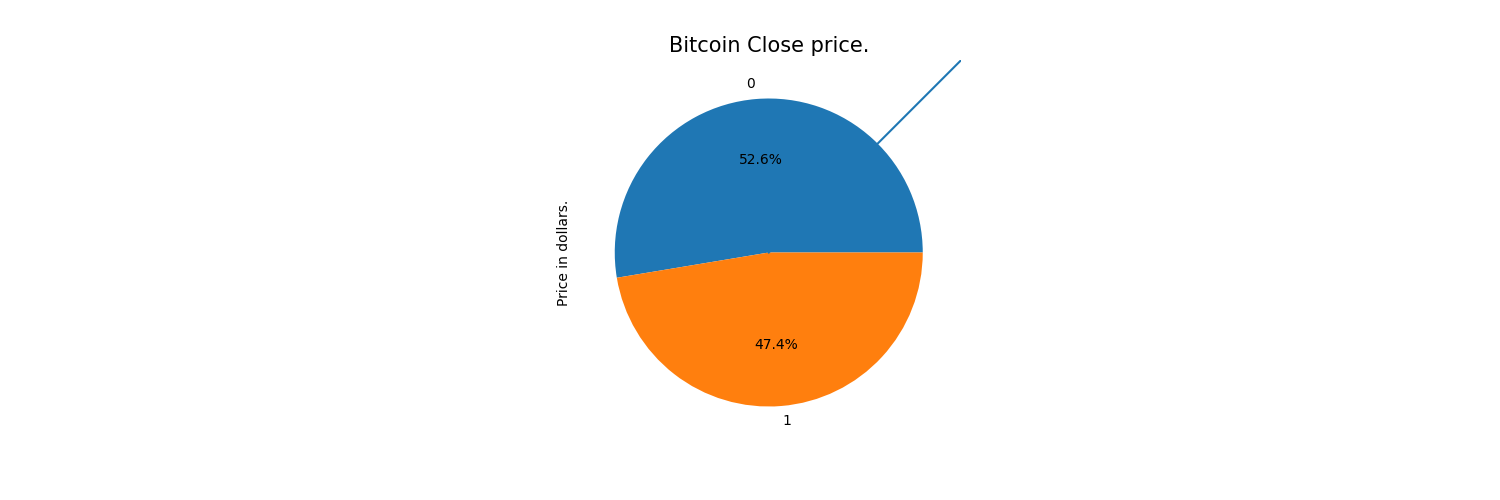

In [86]:
plt.close()
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [122]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.15, random_state=2022)
print(X_train.shape, X_valid.shape)

(3224, 3) (569, 3)


In [123]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
  models[i].max_iter=10000
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression(max_iter=10000) : 
Training Accuracy :  0.5332730775570201
Validation Accuracy :  0.5417666707905481

DecisionTreeClassifier() : 
Training Accuracy :  0.9999905428153768
Validation Accuracy :  0.5209266361499444

KNeighborsClassifier() : 
Training Accuracy :  0.7345734983438347
Validation Accuracy :  0.5565136706668317

